In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path='data/drinks.csv'

drinks=pd.read_csv(file_path)
print(drinks.info())
drinks.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [8]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [9]:
# 두 속성간의 상관관계 구하기
#pearson은 상관 계수를 구하는 방법중 하나, 제일 널리 쓰임

corr=drinks[['beer_servings','wine_servings']].corr(method='pearson')
print(corr)



               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [10]:
cols=['beer_servings','spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']
corr=drinks[cols].corr(method='pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


In [13]:
drinks['continent']=drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


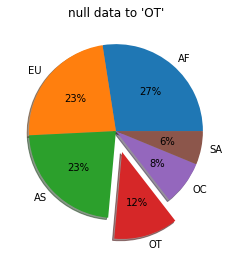

In [25]:
labels=drinks['continent'].value_counts().index.tolist()
drinks['continent'].value_counts().index.tolist()
fracs1=drinks['continent'].value_counts().values.tolist()
explode=(0,0,0,0.25,0,0)

plt.pie(fracs1,explode=explode,labels=labels, autopct='%.0f%%',shadow=True)
plt.title('null data to \'OT\'')
plt.show()

In [27]:
res=drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
res.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [28]:
total_mean=drinks.total_litres_of_pure_alcohol.mean()
continent_mean=drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean=continent_mean[continent_mean>=total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [29]:
# 평균 beer serving이 가장 많은 대륙
beermax=drinks.groupby('continent').beer_servings.mean().idxmax()
print(beermax)

EU


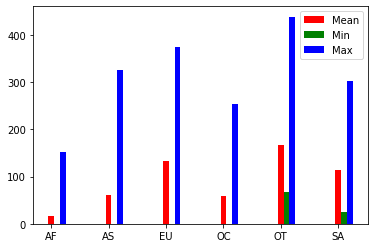

In [32]:
groups=len(res.index)
means=res['mean'].tolist()
mins=res['min'].tolist()
maxs=res['max'].tolist()
sums=res['sum'].tolist()

index=np.arange(groups)
bar_width=0.1

rects1=plt.bar(index,means, bar_width, color='r', label='Mean')
rects2=plt.bar(index+bar_width, mins, bar_width, color='g',label='Min')
rects3=plt.bar(index+bar_width*2,maxs,bar_width,color='b',label='Max')
#rects3=plt.bar(index+bar_width*3,sums,bar_width,color='y',label='Sum')

plt.xticks(index,res.index.tolist())
plt.legend()
plt.show()


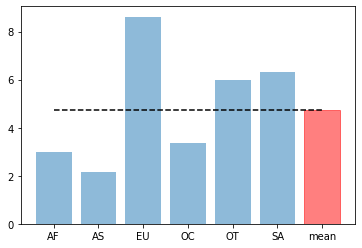

In [35]:
#대륙별 알콜 시각화
con=continent_mean.index.tolist()
con.append('mean')
x_pos=np.arange(len(con))
alcohol=continent_mean.tolist()
alcohol.append(total_mean)

bar_list=plt.bar(x_pos,alcohol, align='center', alpha=0.5)
bar_list[len(con)-1].set_color('r')
plt.plot([0.,6], [total_mean, total_mean], "k--")
plt.xticks(x_pos,con)

plt.show()


In [38]:
drinks['total_servings']=drinks['beer_servings']+drinks['wine_servings']+drinks['spirit_servings']

drinks['alcohol_rate']=drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate']=drinks['alcohol_rate'].fillna(0)

rank=drinks[['country','alcohol_rate']]
rank=rank.sort_values(by=['alcohol_rate'],ascending=0)
rank.head(10)


,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
183,Tanzania,0.132558
26,Burkina Faso,0.110256
33,Central African Republic,0.090000
28,Cote d'Ivoire,0.088889
104,Mali,0.085714


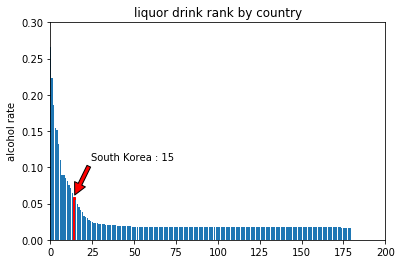

In [41]:
country_list=rank.country.tolist()
x_pos=np.arange(len(country_list))
ran=rank.alcohol_rate.tolist()

bar_list=plt.bar(x_pos,ran)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0,200,0,0.3])

korea_rank=country_list.index("South Korea")
koran=rank[rank['country']=='South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : '+ str(korea_rank +1),
             xy=(korea_rank,koran),
             xytext=(korea_rank+10,koran+0.05),
             arrowprops=dict(facecolor='red',shrink=0.05))

plt.show()
